In [1]:
import pandas as pd 
import warnings as wr 
wr.filterwarnings('ignore') 

In [2]:
df = pd.read_csv('weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [4]:
df.Gender = le.fit_transform(df[['Gender']])

In [5]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [6]:
df.tail()

,Gender,Height,Weight
8550,0,60.483946,110.565497
8551,0,63.423372,129.921671
8552,0,65.584057,155.942671
8553,0,67.429971,151.678405
8554,0,60.921791,131.253738


# Go Ahead

# EDA

In [7]:
df.shape

(8555, 3)

In [8]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df.corr()

,Gender,Height,Weight
Gender,1.000000,0.682524,0.790208
Height,0.682524,1.000000,0.922975
Weight,0.790208,0.922975,1.000000


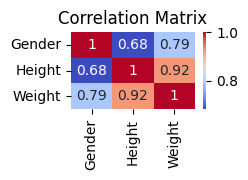

In [11]:
plt.figure(figsize=(2, 1))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

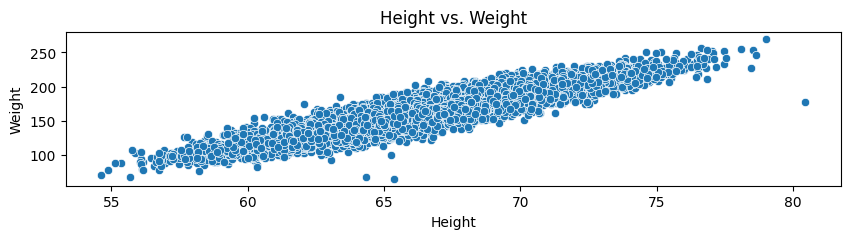

In [12]:
plt.figure(figsize=(10, 2))
sns.scatterplot(x="Height", y="Weight", data=df)
plt.title("Height vs. Weight")
plt.show()

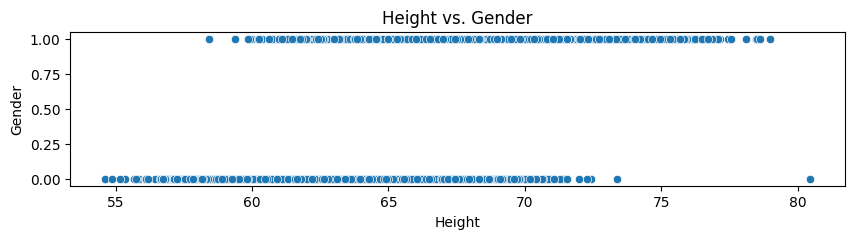

In [13]:
plt.figure(figsize=(10, 2))
sns.scatterplot(x="Height", y="Gender", data=df)
plt.title("Height vs. Gender")
plt.show()

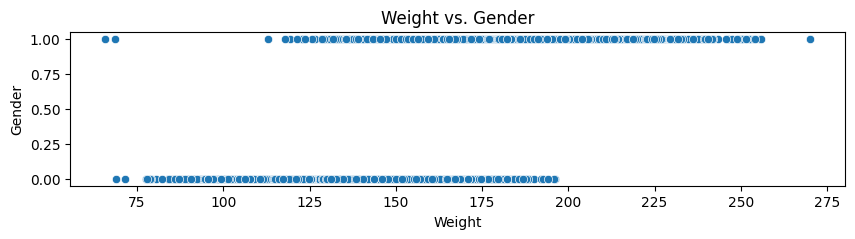

In [14]:
plt.figure(figsize=(10, 2))
sns.scatterplot(x="Weight", y="Gender", data=df)
plt.title("Weight vs. Gender")
plt.show()

# Regression

## Linear Regression

In [15]:
X_LR=df.drop('Weight',axis=1)
Y_LR=df[['Weight']]

In [16]:
X_LR.head(2)

,Gender,Height
0,1,73.847017
1,1,68.781904


In [17]:
Y_LR.head(2)

,Weight
0,241.893563
1,162.310473


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
X_LR_train,X_LR_test,Y_LR_train,Y_LR_test=train_test_split(X_LR,Y_LR,test_size=.30,random_state=42)

In [20]:
LR= LinearRegression()
LR.fit(X_LR_train,Y_LR_train)

LinearRegression()

In [21]:
#Tranning acuracy
LR.score(X_LR_train,Y_LR_train)

0.8973793060969246

In [22]:
#Testing accuracy
LR.score(X_LR_test,Y_LR_test)

0.9059112424422658

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
Y_LR_test_pred=LR.predict(X_LR_test)
mean_squared_error(Y_LR_test,Y_LR_test_pred)

np.float64(96.83734437830613)

## KNN Regressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor

In [26]:
knn_LR=KNeighborsRegressor()

In [27]:
knn_LR.fit(X_LR_train,Y_LR_train)

KNeighborsRegressor()

In [28]:
#Tranning acuracy
knn_LR.score(X_LR_train,Y_LR_train)

0.9172142723737918

In [29]:
#Testing accuracy
knn_LR.score(X_LR_test,Y_LR_test)

0.8821086423439015

In [30]:
Y_LR_test_knnpred=knn_LR.predict(X_LR_test)
mean_squared_error(Y_LR_test,Y_LR_test_knnpred)

np.float64(121.33528273624482)

## Comparison of Linear Rgeression and KNN Regressor

1. Training Score
KNN (0.917) > LR (0.8973)
2.  Testing Score
LR (0.905) > KNN (0.8821)
3. MSE (on Test data)
LR (96.837) < KNN (121.33)

##### Linear Regression performs better overall on this dataset.



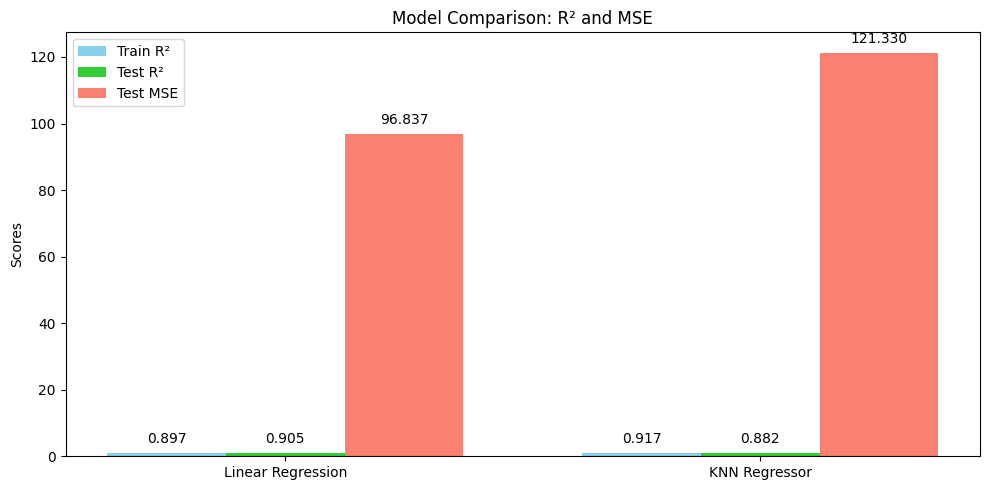

In [31]:
import numpy as np

models = ['Linear Regression', 'KNN Regressor']
train_scores = [0.8973, 0.917]
test_scores = [0.905, 0.8821]
mse_scores = [96.837, 121.33]

x = np.arange(len(models)) 
width = 0.25 


fig, ax = plt.subplots(figsize=(10, 5))


rects1 = ax.bar(x - width, train_scores, width, label='Train R²', color='skyblue')
rects2 = ax.bar(x, test_scores, width, label='Test R²', color='limegreen')
rects3 = ax.bar(x + width, mse_scores, width, label='Test MSE', color='salmon')

ax.set_ylabel('Scores')
ax.set_title('Model Comparison: R² and MSE')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

#Help from ai

# Classification Problem

## Logistic Rgeression

In [32]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [33]:
X_LO=df.drop('Gender',axis=1)
Y_LO=df['Gender']

In [34]:
X_LO.head(2)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473


In [35]:
Y_LO.head(2)

0    1
1    1
Name: Gender, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
X_LO_train,X_LO_test,Y_LO_train,Y_LO_test=train_test_split(X_LO,Y_LO,test_size=0.3,random_state=42)

In [38]:
Y_LO_train.shape

(5988,)

In [39]:
lo=LogisticRegression()

In [40]:
lo.fit(X_LO_train,Y_LO_train)

LogisticRegression()

In [41]:
#Tranning acuracy
lo.score(X_LO_train,Y_LO_train)

0.9173346693386774

In [42]:
#Testing accuracy
lo.score(X_LO_test,Y_LO_test)

0.9185820023373588

## KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knnlo=KNeighborsClassifier(n_neighbors=5)

In [45]:
knnlo.fit(X_LO_train,Y_LO_train)

KNeighborsClassifier()

In [46]:
#Tranning acuracy
knnlo.score(X_LO_train,Y_LO_train)

0.9291917167668671

In [47]:
#Testing accuracy
knnlo.score(X_LO_test,Y_LO_test)

0.9131281651733542

## Comparison of Logistic Rgeression and KNN Classifier

1.Training Score
KNN (0.9292) > Logistic (0.9173)

2.Testing Score
Logistic (0.9186) > KNN (0.913)

##### Logistic regression slightly better

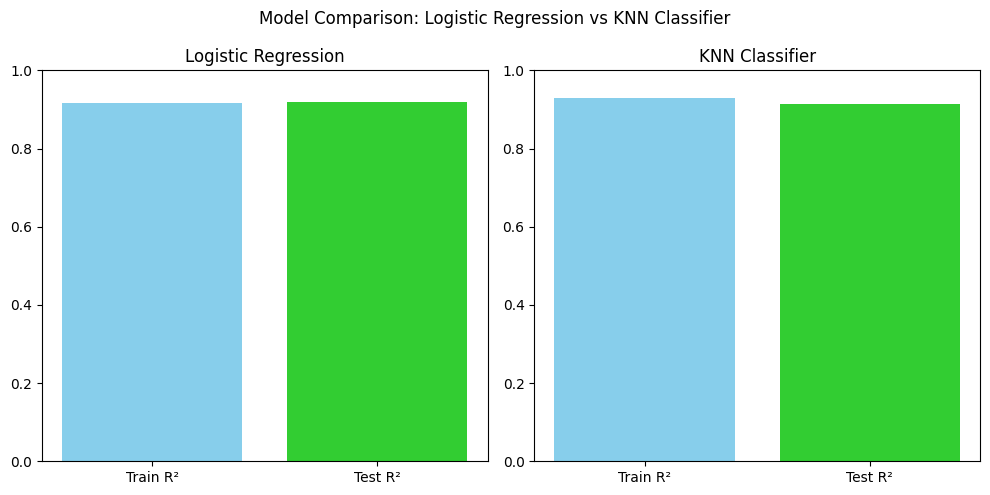

In [48]:
log_train_r2 = 0.9173
log_test_r2 = 0.9186

knn_train_r2 = 0.9292
knn_test_r2 = 0.913

log_metrics = [log_train_r2, log_test_r2]
knn_metrics = [knn_train_r2, knn_test_r2]
labels = ['Train R²', 'Test R²']


fig, axes = plt.subplots(1, 2, figsize=(10, 5))


axes[0].bar(labels, log_metrics, color=['skyblue', 'limegreen'])
axes[0].set_title('Logistic Regression')
axes[0].set_ylim(0, 1)


axes[1].bar(labels, knn_metrics, color=['skyblue', 'limegreen'])
axes[1].set_title('KNN Classifier')
axes[1].set_ylim(0, 1)

plt.suptitle('Model Comparison: Logistic Regression vs KNN Classifier')
plt.tight_layout()
plt.show()

#With help of ai